##### Perkenalan
Pada Tugas Final Projek ini saya melakukan praktik pendekatan dari salah satu metode Machine learning, Supervised Learning alogirma Regressi linier. Pendekatan ini berupa kolom harga tarif atau `price` pada data Uber and Lyft Dataset Boston, MA. 
##### Instalasi librari
Saya menggunakan beberapa librari

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.shape

(693071, 57)

In [3]:
pd.set_option('display.max_columns', 57)
df.head(15)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.0330,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.0000,0.0,0.84,7.19,8.88,1545022800,8.325,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.325,335.8,1545048523,1545081282,0.33,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

##### Data Cleansing
Tahap ini data akan dibersihkan dari data hilang atau `NA` value. Pada Perintah `df.shape` data berjumlah `693071` baris data.

In [5]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Perintah diatas menghasilkan ada `55095` baris data hilang atau missing value. Data tersebut dari kolom harga tarif atau `price` yang akan digunakan untuk pendekatan sebagai objek banding.

In [6]:
df.dropna(axis=0,inplace=True)
df.shape

(637976, 57)

In [7]:
df.duplicated(subset=None).sum()

0

Perintah diatas menghasilkan jumlah `0`, data yang kembar atau Diplicated 
##### Explorasi Data
Tahap ini data akan dijelajahi lebih dalam untuk proses `query`, `grouping`, dan visualisasi sederhana.

In [55]:
d_price = df['price'].fillna(df['price'].mean())
d_price

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693065     9.5
693066    13.0
693067     9.5
693069    27.0
693070    10.0
Name: price, Length: 632387, dtype: float64

Perintah ini untuk mendapatkann rata rata dari baris data `price`. Berikut tampilan plot Box dari baris data `price`.

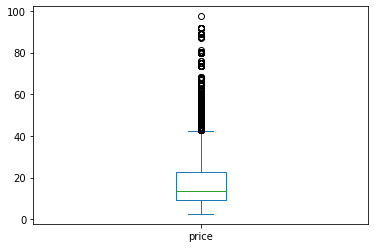

In [10]:
d_price.plot(kind='box')
plt.show()

In [11]:
#Q1, Q3, dan IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

Shape awal:  (637976, 57)


>***Tahap ini, proses hapus `Outlier` panda baris `price`***

Pada jumlah baris dihasilkan `637976` baris dan `57` kolom

In [13]:
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]
df.shape

(632387, 57)

Perintah diatas untuk menyeleksi data `price` dan menyimpan data dengan jika data jaraknya `-11.25` sampai `42.75`
##### Visualisasi Data
Tahap ini data akan dikelompokkan dan dipersentasikan dalam bentuk visualisasi diagram.
>***Price - Destination***

In [14]:
price_destination = df["price"].groupby(df["destination"], axis=0).mean()

Text(0, 0.5, 'Price')

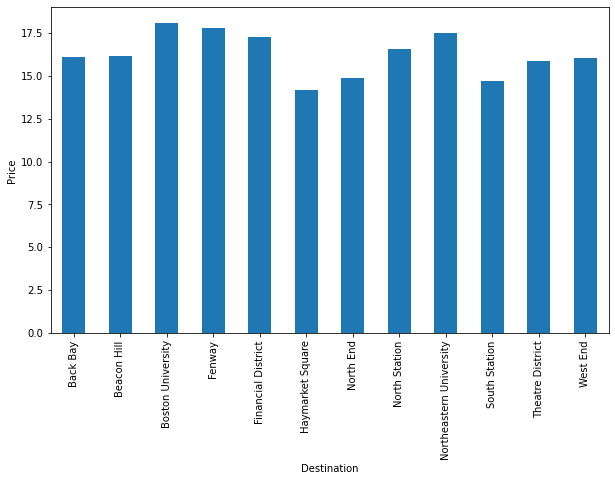

In [15]:
price_destination.plot(kind='bar',figsize=(10, 6))
plt.xlabel('Destination')
plt.ylabel('Price')

Pada visualisasi diagram mendapatkan kota tujuan terbesar `Boston University`.
>***Cab-Type***

C:\Users\Thendro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

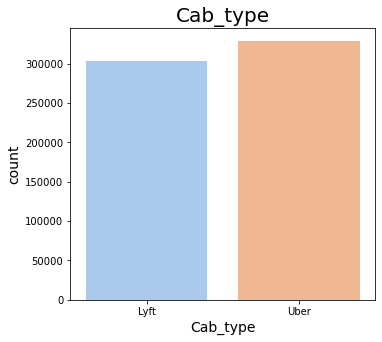

In [61]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.subplot(1,2,1)
sns.countplot(df['cab_type'], palette = 'pastel')
plt.title('Cab_type', fontsize =20)
plt.xlabel('Cab_type', fontsize = 14)
plt.ylabel('count', fontsize = 14)

###### Analisis pada kolom Price (Target)
Tahap ini baris data `price` akan dicek korelasinya menggunakan fiture dibawah ini.

In [65]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)
new_df.head(10)

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureHighTime,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,1544968800,34.19,37.95,27.39,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,0.1299,1.0,0.94,11.98,11.98,4.786,47.30,1543251600,42.10,43.92,36.20,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,1543320000,33.10,44.12,29.11,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,1543510800,28.90,38.53,26.20,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,1543420800,36.71,35.75,30.29,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75
5,18,17,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.033,38.75,33.51,Overcast,0.0000,0.0,0.84,7.19,8.88,8.325,40.61,1545076800,24.07,34.97,12.04,cloudy,34.41,1000.46,294,1.00,1,8.325,335.8,0.33,0.0221,34.19,40.66,27.39,34.97
6,5,26,11,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08,1.0,42.3503,-71.081,41.99,41.99,Overcast,0.0000,0.0,0.91,0.53,0.88,4.675,46.46,1543255200,42.17,43.81,37.08,cloudy,39.54,1014.11,91,1.00,0,4.675,312.3,0.64,0.1245,40.67,46.46,37.45,43.81
7,19,2,12,America/New_York,Back Bay,Northeastern University,Lyft,lyft_lux,Lux Black,16.5,1.08,1.0,42.3503,-71.081,49.88,49.22,Light Rain,0.0246,1.0,0.93,3.38,3.38,3.052,50.80,1543788000,44.97,50.13,45.62,rain,48.02,1004.33,159,1.00,0,3.052,282.5,0.86,0.0916,36.32,50.80,35.84,50.13
8,6,3,12,America/New_York,Back Bay,Northeastern University,Lyft,lyft_line,Shared,3.0,1.08,1.0,42.3503,-71.081,45.58,45.58,Foggy,0.0000,0.0,0.96,1.25,2.09,1.413,57.02,1543852800,33.74,56.35,28.53,fog,44.50,1001.06,307,1.00,0,1.413,290.9,0.89,0.0004,43.09,57.02,39.90,56.35
9,10,27,11,America/New_York,Back Bay,Northeastern University,Lyft,lyft_luxsuv,Lux Black XL,27.5,1.08,1.0,42.3503,-71.081,45.45,41.77,Light Rain,0.0624,1.0,0.93,6.87,7.42,2.686,46.91,1543320000,33.82,44.01,30.19,rain,43.52,989.98,79,1.00,0,2.686,296.2,0.68,0.1425,36.34,46.91,32.43,44.01


In [67]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax','price']

In [68]:
df_temp = new_df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


Data yang sudah dipisah digabungkan dan ditampung ke dalam dataframe `df_temp`

<AxesSubplot:>

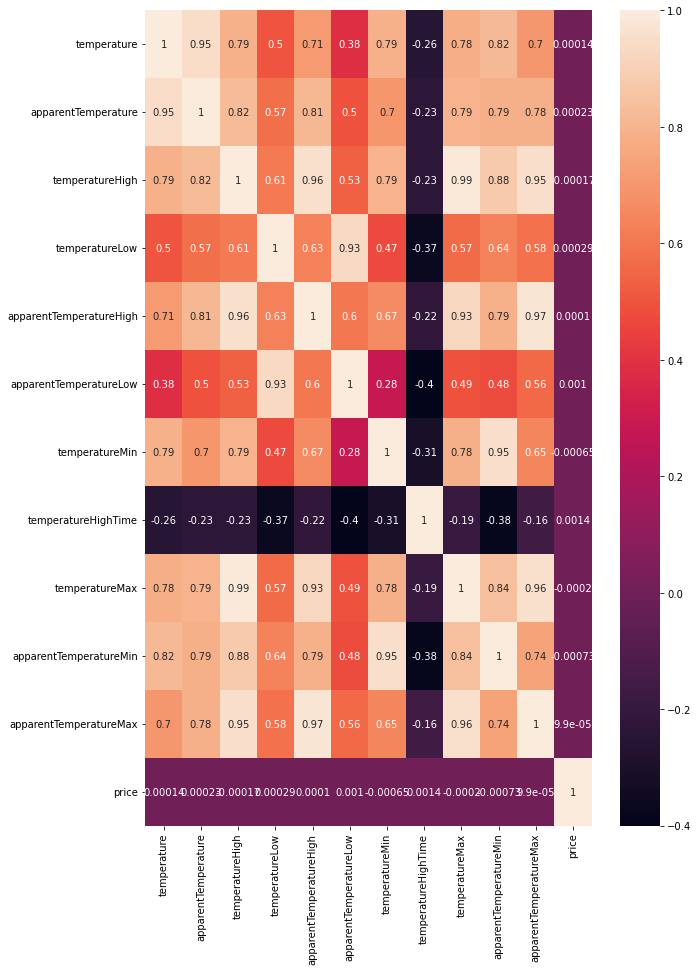

In [69]:
plt.figure(figsize=(10,15))
sns.heatmap(df_temp.corr(),annot=True)

***Semua feature data diatas tidak memiliki korelasi yang bagus terhadap kolom 'price', jadi feature-feature data tersebut akan hapus.*** 

In [70]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(632387, 31)

Berikut mengganti fiture data lainnya terhadap data kolom `price`

In [71]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot:>

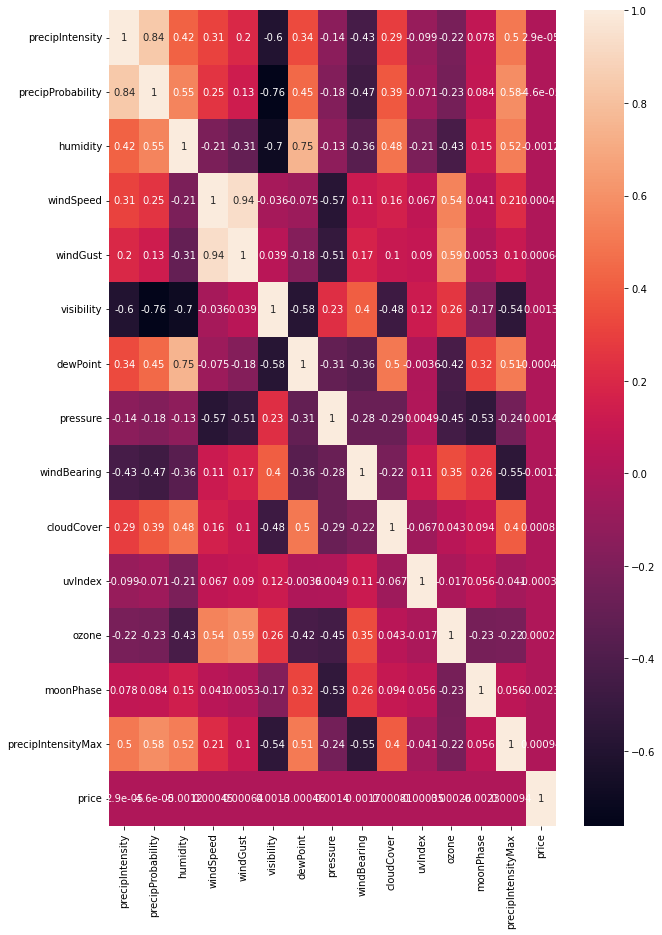

In [72]:
plt.figure(figsize=(10,15))
sns.heatmap(df_clim.corr(),annot=True)

***Semua feature data diatas juga tidak memiliki korelasi yang bagus terhadap kolom 'price'.***

In [73]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(632387, 17)

Dataset ini memiliki feature yang bernilai kategorika, maka kita akan cek feature ini apakah memiliki korelasi atau tidak.

In [74]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

In [75]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

In [76]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


Data yang disaring akan diubah nilainya menjadi kategorikal ke dalam data numerik

In [77]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [78]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<AxesSubplot:>

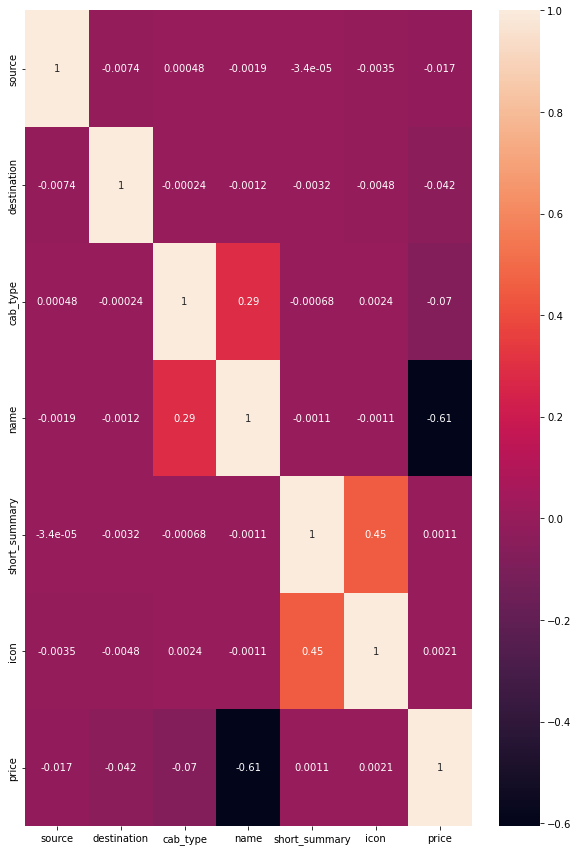

In [79]:
plt.figure(figsize=(10,15))
sns.heatmap(df_cat_encode.corr(),annot=True)

***Sekarang semua feature data diatas memiliki korelasi yang cukup baik terhadap kolom 'price'.***

In [80]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude,visibility.1
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,10.000
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,4.786
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,10.000
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,10.000
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,10.000


***Kita akan menggunakan beberapa kolom dan menghapus kolom, hour, day, month, latitude, dan longitude***

In [81]:
new_df = new_df.drop(['hour','day','month','latitude','longitude'],axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier,visibility.1
0,Lyft,Shared,5.0,0.44,1.0,10.000
1,Lyft,Lux,11.0,0.44,1.0,4.786
2,Lyft,Lyft,7.0,0.44,1.0,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,10.000


In [82]:
new_df = new_df.drop(['visibility.1'],axis=1)

Berikut kolom yang memiliki korelasi yang bagus untuk modeling

In [83]:
new_df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


In [84]:
new_df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

##### Regressi model
Tahap terakhir, membuat model dari data yang sudah dijelajahi dan  dioleh
>***proses one hot encoding***

In [85]:
new_df_onehot = pd.get_dummies(new_df)
new_df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


>***Proses split dataset***

In [86]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values 
y = new_df_onehot['price'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

>***Proses Modeling data***

In [87]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [88]:
x = reg.coef_

In [89]:
reg.coef_

array([ 2.66637755e+00,  1.36606942e+01, -2.40998117e+10,  2.70594418e+10,
        1.62500996e+11,  1.62500996e+11,  2.13660250e+11,  2.13660250e+11,
        2.13660250e+11,  2.13660250e+11,  2.13660250e+11,  2.13660250e+11,
        1.62500996e+11,  1.62500996e+11,  1.62500996e+11,  1.62500996e+11])

In [90]:
reg.intercept_

-189560437969.1163

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9337798175445308

***Model yang sudah dibuat memiliki score 93%***

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

Mean squared error of testing set: 5.108312720637926
Mean absolute error of testing set: 1.676210503446056
Root Mean Squared Error of testing set: 2.2601576760566786
